**Author:**

[**Shiva Omprakash**](https://www.linkedin.com/in/sivashanmugam-omprakash/)

M.S. in Robotics & Machine Learning, University at Buffalo (SUNY)

#Recommendation System

## Collaborative filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

![Union](https://www.probabilitycourse.com/images/chapter1/union_b.png)

In [1]:

# Installing required dependencies
!pip3 install pandas matplotlib numpy scikit-surprise


In [2]:

# Importing required libraries
import pandas as pd

from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate


In [3]:

# Understanding the available ratings dataset
ratings_df= pd.read_csv('/content/drive/MyDrive/Projects/Mini/Movie Recommendation - Collaborative filtering/ratings.csv')
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:

# Removing unnecessary columns
ratings_df.drop('timestamp', axis= 1, inplace= True)
ratings_df.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:

# Check for missing data
ratings_df.isna().sum()


userId     0
movieId    0
rating     0
dtype: int64

### Exploratory Data Analysis (EDA)

In [6]:

# Finding the unique number of movies & users
movies_n= ratings_df['movieId'].nunique()
users_n= ratings_df['userId'].nunique()
print('Number of unique movies: '+str(movies_n))
print('Number of unique users: '+str(users_n))


Number of unique movies: 9724
Number of unique users: 610


**Sparsity**

Calculates the percentage of values missing in the data.

$\text{Sparsity (%)} = \frac{\text{Number of missing values}}{\text{Total values}} * 100$

In [7]:

# Calculating sparsity
available_ratings= ratings_df['rating'].count()
total_ratings= movies_n * users_n
missing_ratings= total_ratings - available_ratings
sparsity= (missing_ratings/total_ratings)*100

print('Sparsity: '+str(sparsity)[:5]+'%')


Sparsity: 98.30%


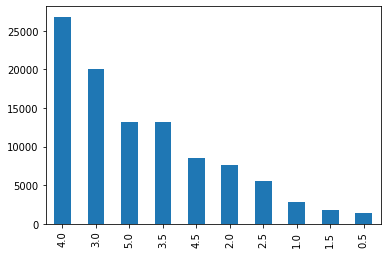

In [8]:

# Understanding the spread of given ratings
ratings_df['rating'].value_counts().plot(kind= 'bar')


###Dimensionality Reduction

In [9]:

# Filtering any movies with less than 3 ratings
filter_movies= ratings_df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

# Filtering any user who rated less than 3 movie
filter_users = ratings_df['userId'].value_counts() > 3
filter_users= filter_users[filter_users].index.tolist()

# Applying filter to the main dataframe
ratings_df= ratings_df[(ratings_df['movieId'].isin(filter_movies)) & (ratings_df['userId'].isin(filter_users))]
ratings_df.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


###Recommendation model

In [10]:

train_cols= ['userId', 'movieId', 'rating']

# Creating surprise dataset
reader= Reader(rating_scale= (0.5, 5))
data= Dataset.load_from_df(ratings_df[train_cols], reader)

# Creating training & test data
trainset= data.build_full_trainset()
antiset= trainset.build_anti_testset()


**Singular Value Decomposition (SVD) Model**

This reduces the overall matrix to 3 sub-matrices (one for each column, say A, B, & C) whose product will give us the Interaction matrix.

$\text{Interaction matrix} = \textbf{A} \times \textbf{B} \times \textbf{C}$

In [11]:

# Implementing a SVD model
model= SVD(n_epochs= 25, verbose= True)


**Cross-validation**
This method is to train the model with k-th part of data over k times.

Advantages:

1. More accurate estimate of out-of-sample accuracy.
2. More “efficient” use of data as every observation is used for both training and testing.

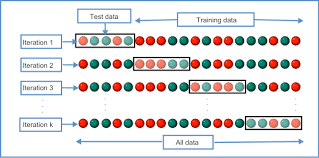

In [ ]:

cross_validate(model, data, measures= ['RMSE', 'MAE'], cv= 5, verbose= False)


In [13]:

# Predict/Recommend
predict= model.test(antiset)


In [14]:

# Displaying top n number of predictions for first 5 users
from collections import defaultdict

def get_top_n(pred, n):
  top_n= defaultdict(list)
  for uid, iid, _, est, _ in pred:
    top_n[uid].append((iid, est))
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key= lambda x: x[1], reverse= True)
    top_n[uid]= user_ratings[:n]
  
  return top_n

top_n= get_top_n(predict, n= 3)

x= 1
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in user_ratings])
  if x==5:
    break
  x+=1


1 [318, 58559, 720]
2 [2571, 2959, 1225]
3 [750, 1230, 110]
4 [2580, 1247, 112290]
5 [1250, 1242, 112552]
